In [1]:
from ecmwfapi import *
import earthkit.data
import earthkit.plots

# ECMWFAPI for Mars WebAPI retrievals

## [Web API Documentation](https://confluence.ecmwf.int/display/WEBAPI/ECMWF+Web+API+Home)

In [2]:
server = ECMWFService("mars")

request = {
    "class": "od",
    "date": "-1",
    "expver": "1",
    "param": 140120,
    "step": "12",
    "stream": "wave",
    "time": "00",
    "type": "fc",
    "grid": "0.25/0.25", # interpolation done on client
    "area": "55/-15/34.0/5.0",  #+N, -W, -S, +E
    'format' : "netcdf" # not fully supported, wont work for all fields, only available from webapi. Larger than grib!
    # Recommended to convert with eccodes on local machine to reduce queueing times on webapi. Can also be done on mars catalogue
}
server.execute(request, "data/target.nc")

2025-10-14 20:55:08 ECMWF API python library 1.6.5
2025-10-14 20:55:08 ECMWF API at https://api.ecmwf.int/v1
2025-10-14 20:55:08 Welcome Alice Sartori Monteiro de Barros
2025-10-14 20:55:08 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2025-10-14 20:55:08 Request submitted
2025-10-14 20:55:08 Request id: 68eeb8acf6eccfad155d9887
2025-10-14 20:55:08 Request is submitted
2025-10-14 20:55:10 Request is active
2025-10-14 20:55:15 Calling 'nice mars /tmp/20251014-2050/de/tmp-_mars-T5VkEF-57d8d50431ea42f4edec5a83d8accf3f.req'
2025-10-14 20:55:15 Forcing MIR_CACHE_PATH=/data/ec_coeff
2025-10-14 20:55:15 mars - WARN -
2025-10-14 20:55:15 mars - WARN -
2025-10-14 20:55:15 MIR environment variables:
2025-10-14 20:55:15 MIR_CACHE_PATH=/data/ec_coeff
2025-10-14 20:55:15 MIR_LSM_NAMED=1km.climate.v013
2025-10-14 20:55:15 Using MARS binary: /usr/local/apps/mars/versions/6.33.24.5/bin/mars.bin
2025-10-14 20:55:15 mars - INFO

### Check your request status [here](https://apps.ecmwf.int/webmars/joblist/), it should show up on webapi

In [3]:
fs = earthkit.data.from_source("file", "data/target.nc")

In [4]:
fx = fs.to_xarray()

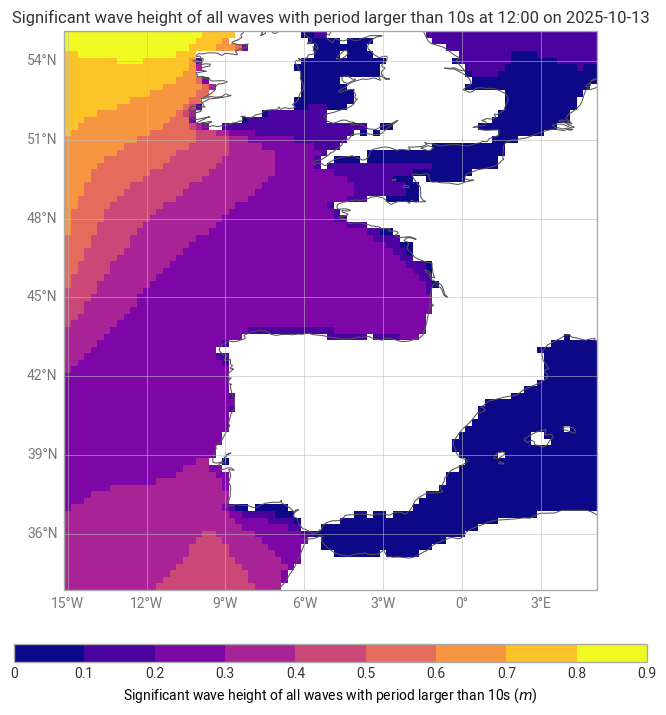

In [5]:
chart = earthkit.plots.Map()
chart.grid_cells(
    fx
)
chart.legend()
chart.title()
chart.coastlines()
chart.gridlines()
chart.show()

# Public Datasets

## [link to public datasets catalogue](https://apps.ecmwf.int/datasets/)

In [2]:
from ecmwfapi import ECMWFDataServer

# To run this example, you need an API key
# available from https://api.ecmwf.int/v1/key/

server = ECMWFDataServer()
server.retrieve({
    'origin'    : "ecmf",
    'levtype'   : "sfc",
    'number'    : "1",
    'expver'    : "prod",
    'dataset'   : "tigge",
    'step'      : "0/to/72",
    "area" : "80/60/10/170",
    'grid'      : "0.25/0.25",
    'param'     : "167",
    # 'time'      : "00/12",
    'date'      : "2025-10-10",
    'type'      : "pf",
    'class'     : "ti",
    'target'    : "data/tigge.grib"
})

2025-10-14 21:40:54 ECMWF API python library 1.6.5
2025-10-14 21:40:54 ECMWF API at https://api.ecmwf.int/v1
2025-10-14 21:40:54 Welcome Alice Sartori Monteiro de Barros
2025-10-14 21:40:54 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2025-10-14 21:40:54 ------------ WARNING ------------
2025-10-14 21:40:54 Access to this dataset is transitioning to a new interface, dates to be announced soon
2025-10-14 21:40:54 For more information on how to access this data in the future, visit https://confluence.ecmwf.int/x/-wUiEw
2025-10-14 21:40:54 ---------------------------------
2025-10-14 21:40:55 Request submitted
2025-10-14 21:40:55 Request id: 68eec3672b019cf9aa5d8e5d
2025-10-14 21:40:55 Request is submitted
2025-10-14 21:40:56 Request is queued
2025-10-14 21:41:01 Calling 'nice mars /tmp/20251014-2140/d6/tmp-_mars-i8x7a3-2ad2aa3f45976ede1efa0f8f34ebfb21.req'
2025-10-14 21:41:01 Forcing MIR_CACHE_PATH=/data/ec_coe

### Check your request status [here](https://apps.ecmwf.int/webmars/joblist/), it should show up on webapi

In [8]:
ds = earthkit.data.from_source("file", "data/tigge.grib")

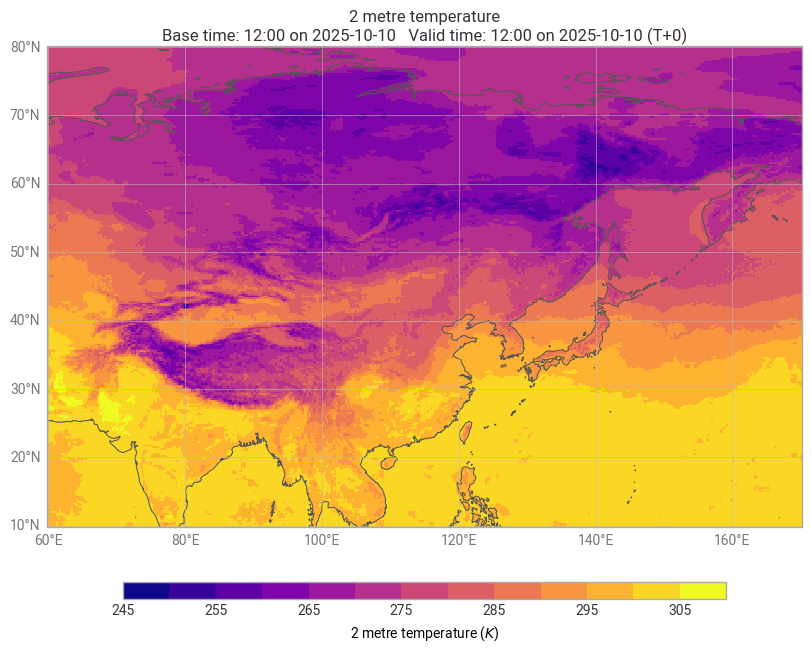

In [10]:
chart = earthkit.plots.Map()
chart.grid_cells(
    ds[0]
)
chart.legend()
chart.title()
chart.coastlines()
# chart.ocean(color="white")
chart.gridlines()
chart.show()